In [5]:
import zipfile
import os

zip_path = "../data/raw/archive (8).zip"
extract_path = "../data/raw/"

with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(extract_path)

print("✅ Unzip completed!")
print("Files in raw folder:")
print(os.listdir(extract_path))


✅ Unzip completed!
Files in raw folder:
['archive (8).zip', 'data.csv']


In [6]:
import pandas as pd

RAW_PATH = "../data/raw/data.csv"

df = pd.read_csv(RAW_PATH, encoding="latin1")

print("Shape:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())
print("\nMissing values:\n", df.isna().sum())
print("\nDuplicates:", df.duplicated().sum())

df.head()


Shape: (541909, 8)

Column Names:
 ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

Missing values:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Duplicates: 5268


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
# Standardize column names
df.columns = [c.strip().lower() for c in df.columns]

# Remove duplicates
df = df.drop_duplicates()

print("After removing duplicates:", df.shape)

# Convert invoice date to datetime
df["invoicedate"] = pd.to_datetime(df["invoicedate"])

# Remove rows with missing CustomerID (important for customer analysis)
df = df.dropna(subset=["customerid"])

print("After dropping missing CustomerID:", df.shape)

df.head()


After removing duplicates: (536641, 8)
After dropping missing CustomerID: (401604, 8)


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
df["revenue"] = df["quantity"] * df["unitprice"]

df.head()


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [9]:
df[df["quantity"] < 0].head()


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,revenue
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96


In [10]:
df = df[df["quantity"] > 0]
df = df[df["unitprice"] > 0]

print("After removing returns:", df.shape)


After removing returns: (392692, 9)


In [11]:
# Create month column
df["month"] = df["invoicedate"].dt.to_period("M")

# Create year column
df["year"] = df["invoicedate"].dt.year

df.head()


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,revenue,month,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010


In [12]:
kpis = {
    "Total Transactions": df["invoiceno"].nunique(),
    "Total Customers": df["customerid"].nunique(),
    "Total Revenue": round(df["revenue"].sum(), 2),
    "Average Order Value": round(df.groupby("invoiceno")["revenue"].sum().mean(), 2),
    "Top Country": df["country"].mode()[0]
}

pd.DataFrame([kpis])


,Total Transactions,Total Customers,Total Revenue,Average Order Value,Top Country
0,18532,4338,8887208.89,479.56,United Kingdom


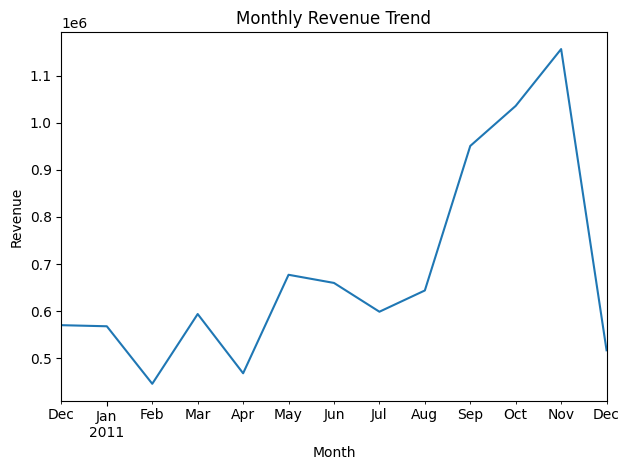

In [13]:
monthly_revenue = df.groupby("month")["revenue"].sum()

import matplotlib.pyplot as plt

plt.figure()
monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("../outputs/monthly_revenue.png", dpi=200)
plt.show()


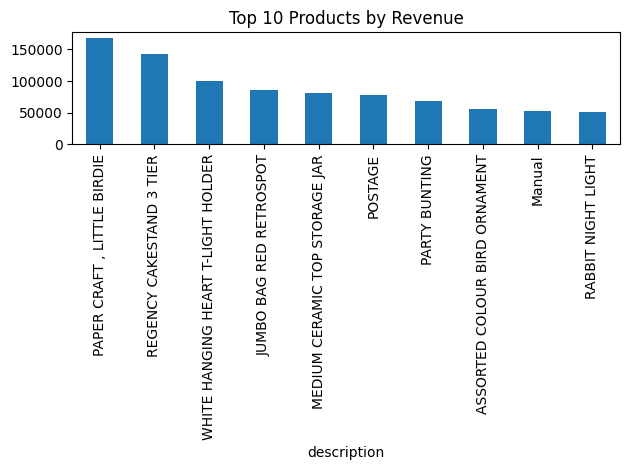

In [14]:
top_products = df.groupby("description")["revenue"].sum().sort_values(ascending=False).head(10)

plt.figure()
top_products.plot(kind="bar")
plt.title("Top 10 Products by Revenue")
plt.tight_layout()
plt.savefig("../outputs/top_products.png", dpi=200)
plt.show()


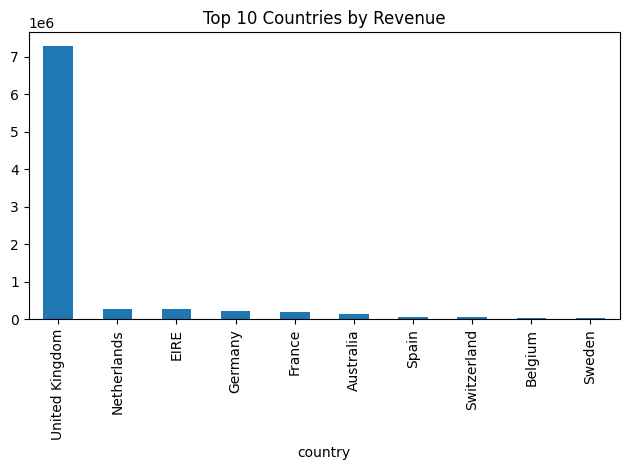

In [15]:
top_countries = df.groupby("country")["revenue"].sum().sort_values(ascending=False).head(10)

plt.figure()
top_countries.plot(kind="bar")
plt.title("Top 10 Countries by Revenue")
plt.tight_layout()
plt.savefig("../outputs/top_countries.png", dpi=200)
plt.show()


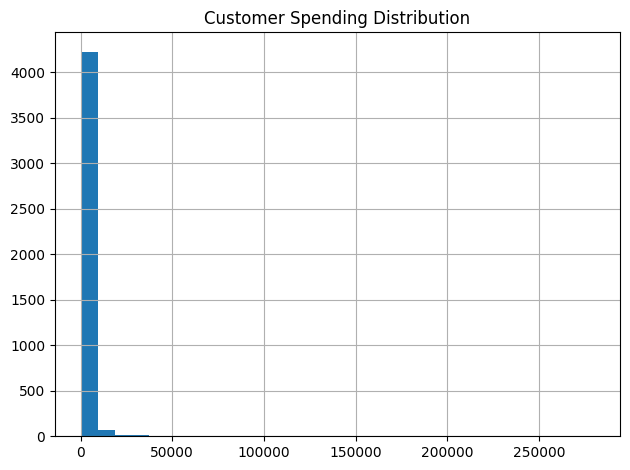

In [16]:
customer_spend = df.groupby("customerid")["revenue"].sum()

plt.figure()
customer_spend.hist(bins=30)
plt.title("Customer Spending Distribution")
plt.tight_layout()
plt.savefig("../outputs/customer_distribution.png", dpi=200)
plt.show()


In [17]:
df.to_csv("../data/processed/retail_cleaned.csv", index=False)
print("Saved cleaned dataset")


Saved cleaned dataset
